# Exploratory Data Analysis

## Importing required modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, plot_roc_curve, plot_confusion_matrix
from collections import Counter

from IPython.display import display, HTML

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)

## Loading data

In [ ]:
BASE_FNAME = 'application_{}.csv'

df_train = pd.read_csv(BASE_FNAME.format('train'))
df_test = pd.read_csv(BASE_FNAME.format('test'))

In [ ]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_train.shape

(33011, 122)

In [ ]:
df_test.shape

(32706, 121)

## Data description

In [ ]:
df_desc = pd.read_csv("HomeCredit_columns_description.csv", index_col=0, encoding='unicode_escape')
df_desc = df_desc[df_desc['Table'] == "application_{train|test}.csv"]
df_desc.head()

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [ ]:
for column in df_train.columns:
    display(HTML(f"<b>{column}</b>: <i>{df_desc[df_desc['Row'] == column]['Description'].iloc[0]}</i>"))

In [ ]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,33011.000000,33011.000000,33011.000000,3.301100e+04,3.301100e+04,33011.000000,3.298400e+04,33011.000000,33011.000000,33011.000000,33011.000000,33011.000000,11248.000000,33011.000000,33011.000000,33011.000000,33011.000000,33011.000000,33011.000000,33011.000000,33011.000000,33011.000000,33011.000000,33011.000000,33011.000000,33011.000000,33011.000000,33011.000000,33011.000000,14387.000000,3.293000e+04,26486.000000,16270.000000,13720.000000,16904.000000,11015.000000,9878.000000,15439.000000,16411.000000,16621.000000,...,16410.000000,16620.000000,10590.000000,13370.000000,10365.000000,16388.000000,10048.000000,14844.000000,17073.000000,32897.000000,32897.000000,32897.000000,32897.000000,33009.000000,33010.000000,33010.000000,33010.000000,33010.000000,33010.000000,33010.000000,33010.000000,33010.000000,33010.000000,33010.000000,33010.0,33010.000000,33010.000000,33010.000000,33010.000000,33010.000000,33010.000000,33010.000000,33010.000000,33010.000000,28563.000000,28563.000000,28563.000000,28563.000000,28563.000000,28563.000000
mean,119207.042471,0.080640,0.416073,1.719701e+05,5.995780e+05,27136.602011,5.390546e+05,0.020769,-16043.260398,64329.701433,-4965.102875,-2987.608615,12.050053,0.999970,0.818424,0.199206,0.997758,0.277877,0.055436,2.156584,2.050377,2.029839,12.069431,0.015995,0.050105,0.038987,0.081337,0.233346,0.179910,0.503252,5.145394e-01,0.512548,0.117400,0.089161,0.978601,0.751156,0.044451,0.077879,0.150596,0.225034,...,0.150182,0.224654,0.231125,0.067433,0.101880,0.108602,0.008824,0.028111,0.102057,1.431711,0.143904,1.414688,0.099979,-963.796328,0.000030,0.711542,0.000182,0.015571,0.086852,0.000212,0.080733,0.003696,0.000030,0.004211,0.0,0.003332,0.002817,0.000879,0.010451,0.000303,0.008513,0.000757,0.000545,0.000394,0.007072,0.007842,0.033155,0.270140,0.259427,1.891573
std,11060.673839,0.272285,0.722768,6.506173e+05,4.025613e+05,14668.179195,3.701127e+05,0.013774,4359.734752,141725.655339,3520.318643,1511.405954,11.808664,0.005504,0.385500,0.399410,0.047294,0.447959,0.228833,0.909634,0.507539,0.501606,3.235598,0.125456,0.218164,0.193567,0.273355,0.422967,0.384118,0.210543,1.906652e-01,0.194837,0.107745,0.083683,0.050962,0.113631,0.079357,0.133547,0.101037,0.144861,...,0.101366,0.145313,0.160844,0.080673,0.094795,0.111417,0.048951,0.069950,0.106560,2.324591,0.444813,2.304878,0.361889,825.977537,0.005504,0.453052,0.013481,0.123811,0.281623,0.014561,0.272429,0.060682,0.005504,0.064755,0.0,0.057631,0.053004,0.029627,0.101698,0.017403,0.091871,0.027510,0.023345,0.019841,0.087878,0.115078,0.1

In [ ]:
df_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,32706.000000,32706.000000,3.270600e+04,3.270600e+04,32685.000000,3.270600e+04,32706.000000,32706.000000,32706.000000,32706.000000,32706.000000,10992.000000,32706.0,32706.000000,32706.000000,32706.000000,32706.000000,32706.000000,32706.000000,32706.000000,32706.000000,32706.000000,32706.000000,32706.000000,32706.000000,32706.000000,32706.000000,32706.000000,18878.000000,32702.000000,26889.000000,16700.000000,14176.000000,17370.000000,11381.000000,10260.000000,15823.000000,16884.000000,17053.000000,10942.000000,...,16884.000000,17053.000000,10942.000000,13803.000000,10731.000000,16906.000000,10338.000000,15200.000000,17516.000000,32684.000000,32684.000000,32684.000000,32684.000000,32705.000000,32705.0,32705.000000,32705.000000,32705.000000,32705.000000,32705.000000,32705.000000,32705.000000,32705.0,32705.000000,32705.0,32705.0,32705.0,32705.0,32705.0,32705.0,32705.000000,32705.0,32705.0,32705.0,28654.000000,28654.000000,28654.000000,28654.000000,28654.000000,28654.000000
mean,218826.205589,0.396563,1.784764e+05,5.165590e+05,29398.560854,4.624583e+05,0.021228,-16071.058399,67284.119366,-4959.814652,-3051.233963,11.814229,1.0,0.810249,0.204825,0.998380,0.264477,0.163731,2.148046,2.039167,2.013453,11.997340,0.018529,0.054577,0.041491,0.077050,0.224729,0.173944,0.501223,0.517912,0.498723,0.122752,0.090150,0.978703,0.751190,0.048216,0.085602,0.151708,0.234247,0.239715,...,0.151102,0.233721,0.239156,0.068530,0.107622,0.113868,0.008769,0.028854,0.107796,1.429721,0.141751,1.418339,0.099743,-1079.719584,0.0,0.787311,0.000061,0.014707,0.087601,0.000061,0.087815,0.004250,0.0,0.001040,0.0,0.0,0.0,0.0,0.0,0.0,0.001682,0.0,0.0,0.0,0.001885,0.001745,0.002687,0.009353,0.549801,1.983667
std,68809.936724,0.709483,1.027324e+05,3.656678e+05,16037.125527,3.372967e+05,0.014347,4319.251125,144194.367018,3550.577258,1569.973999,11.515334,0.0,0.392110,0.403580,0.040223,0.441061,0.370037,0.889167,0.522095,0.514938,3.278216,0.134855,0.227156,0.199426,0.266675,0.417410,0.379067,0.204554,0.181793,0.189706,0.113340,0.081424,0.050508,0.112099,0.084107,0.139473,0.100100,0.147049,0.165382,...,0.100348,0.147419,0.165713,0.083448,0.100085,0.117248,0.044706,0.072268,0.112449,2.317008,0.439124,2.305262,0.358173,879.941241,0.0,0.409216,0.007820,0.120380,0.282718,0.007820,0.283030,0.065055,0.0,0.032227,0.0,0.0,0.0,0.0,0.0,0.0,0.040975,0.0,0.0,0.0,0.043371,0.044957,0.053754,0.112011,0.696663,1.846294
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,-6

## Filling NaN data

In [ ]:
nans = df_train.isna().to_numpy()
df_nans_ratios = pd.DataFrame()
df_nans_ratios['column'] = df_train.columns
df_nans_ratios['nans_ratio'] = np.zeros_like(len(df_nans_ratios))

for col in range(nans.shape[1]):
    column_values = nans[:,col]
    nans_ratio = len(column_values[column_values == True]) / nans.shape[0]
    df_nans_ratios['nans_ratio'][col] = nans_ratio
    
df_nans_ratios

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,column,nans_ratio
0,SK_ID_CURR,0
1,TARGET,0
2,NAME_CONTRACT_TYPE,0
3,CODE_GENDER,0
4,FLAG_OWN_CAR,0
...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,0
118,AMT_REQ_CREDIT_BUREAU_WEEK,0
119,AMT_REQ_CREDIT_BUREAU_MON,0
120,AMT_REQ_CREDIT_BUREAU_QRT,0


In [ ]:
df_train.fillna(method='ffill', inplace=True)
df_test.fillna(method='ffill', inplace=True)

## Distributions Assumptions

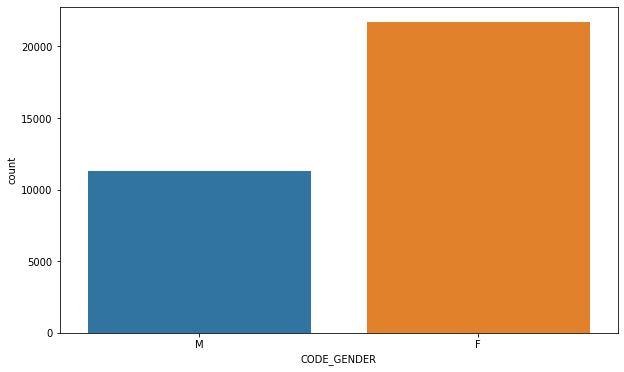

In [ ]:
sns.countplot(x='CODE_GENDER', data=df_train)

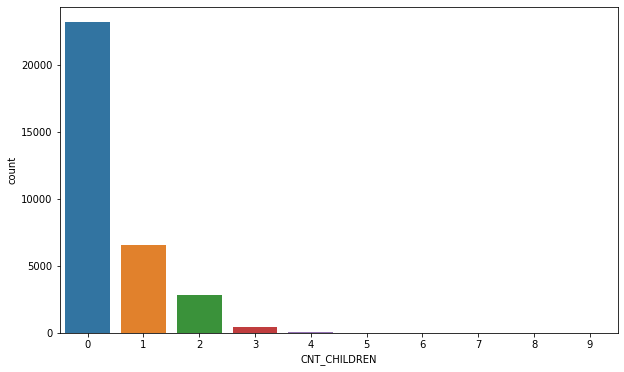

In [ ]:
sns.countplot(x='CNT_CHILDREN', data=df_train)

In [ ]:
AMT_cols = list(filter(lambda col: col.startswith('AMT') and "BUREAU" not in col, df_train.columns))
AMT_cols

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

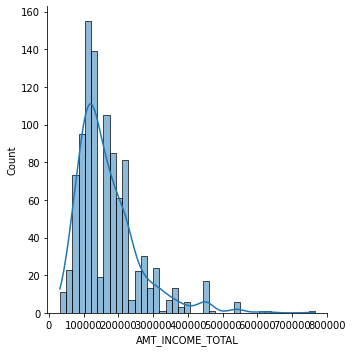

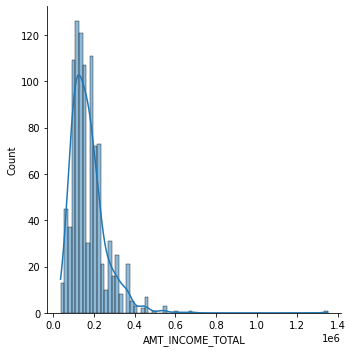

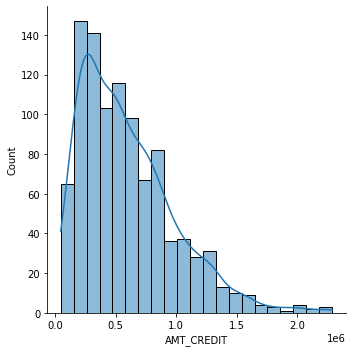

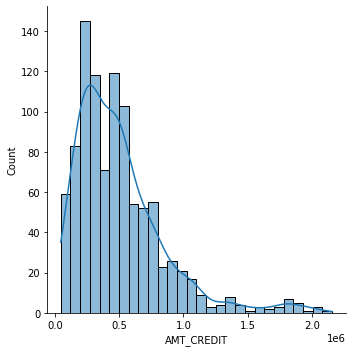

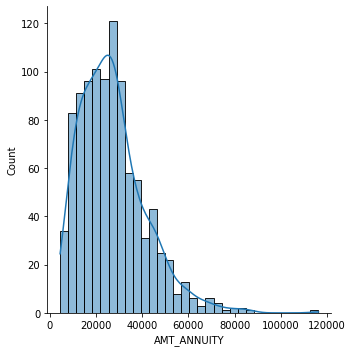

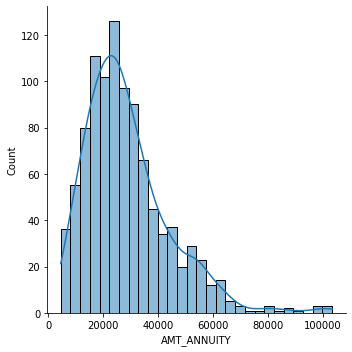

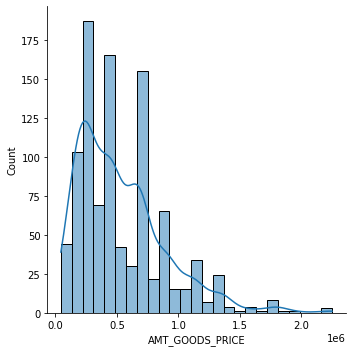

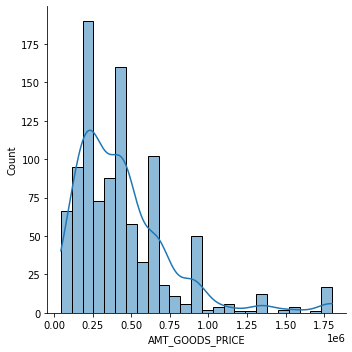

In [ ]:
for colname in AMT_cols:
    ax = sns.displot(df_train[colname][:1000], kde=True)
    sns.displot(df_test[colname][:1000], kde=True)

## Training

In [ ]:
X_train = df_train.drop("TARGET", axis='columns')
X_train = X_train.apply(lambda col: pd.factorize(col, sort=True)[0])
X_train

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,1,0,1,0,414,806,3232,81,6,6,4,3,1,62,13111,6419,8031,3502,-1,1,1,0,1,1,0,8,0,1,1,6,10,0,0,0,0,0,0,5,...,33,192,0,0,2,0,147,5,0,2,2,2,2,2147,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,496,2517,4989,298,1,3,1,1,1,10,6547,5869,10403,5312,-1,1,1,0,1,1,0,3,1,0,0,1,11,0,0,0,0,0,0,39,...,154,557,2,100,2,0,712,0,0,1,0,1,0,2453,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,1,1,1,0,92,159,263,21,6,6,4,3,1,46,4561,6831,7437,3094,26,1,1,1,1,1,0,8,0,1,1,1,9,0,0,0,0,0,0,11,...,154,557,2,100,2,0,712,0,0,0,0,0,0,2466,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,1,0,278,580,4091,66,6,6,4,0,1,33,4601,4045,2406,3187,26,1,1,0,1,0,0,8,1,1,1,6,17,0,0,0,0,0,0,5,...,154,557,2,100,2,0,712,0,0,2,0,2,0,2664,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,1,0,1,0,243,1080,2740,143,6,6,4,3,1,73,3771,4046,7387,2170,26,1,1,0,1,0,0,3,0,1,1,4,11,0,0,0,0,1,1,37,...,154,557,2,100,2,0,712,0,0,0,0,0,0,2175,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33006,33006,0,0,1,1,0,163,1118,3618,117,6,6,1,1,1,73,7993,6522,4108,1120,7,1,1,1,1,0,0,0,1,1,1,4,9,0,0,0,0,0,0,11,...,368,770,0,324,2,1,743,5,0,9,1,9,1,2045,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5
33007,33007,0,0,0,1,1,381,509,2264,46,6,6,4,1,1,64,11724,4800,6736,2052,7,1,1,0,1,0,0,0,2,1,1,4,17,0,0,0,0,0,0,13,...,368,770,0,324,2,1,743,5,0,3,0,3,0,3281,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
33008,33008,0,0,0,1,0,453,945,1589,122,1,6,4,4,1,57,1065,5917,902,572,7,1,1,0,1,1,0,14,0,1,1,0,17,0,0,0,0,0,0,51,...,368,555,0,324,2,0,471,4,0,0,0,0,0,2260,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
33009,33009,0,1,1,1,0,446,1458,3654,187,1,2,4,1,1,54,3788,7010,782,2172,4,1,0,0,1,0,0,14,1,1,1,3,11,0,0,0,0,0,0,57,...,368,555,0,324,2,0,471,4,0,2,0,2,0,1412,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [ ]:
y_train = df_train[["TARGET"]]
y_train

,TARGET
0,1
1,0
2,0
3,0
4,0
...,...
33006,0
33007,0
33008,0
33009,0


In [ ]:
X_test = df_test
X_test = X_test.apply(lambda col: pd.factorize(col, sort=True)[0])
X_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,0,0,1,0,221,1172,2069,217,6,6,1,1,1,64,4308,4691,6465,4930,-1,0,1,0,1,0,1,-1,1,1,2,5,18,0,0,0,0,0,0,28,...,-1,512,-1,-1,-1,0,390,5,0,0,0,0,0,1728,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,151,324,1600,69,6,6,4,1,1,78,5331,2736,2943,4124,-1,0,1,0,1,0,0,9,1,1,2,0,9,0,0,0,0,0,0,42,...,-1,512,-1,-1,-1,0,390,5,0,0,0,0,0,3465,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
2,2,0,1,1,1,0,323,1378,6175,294,6,6,1,1,1,65,3614,2745,9323,2253,5,0,1,0,1,0,0,4,1,1,2,1,14,0,0,0,0,0,0,54,...,-1,512,-1,-1,-1,0,390,5,0,0,0,0,0,2609,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4
3,3,0,0,0,1,2,402,2385,5301,527,6,6,4,1,1,73,9012,5140,9487,1560,5,0,1,0,1,1,0,14,3,1,2,6,11,0,0,0,0,0,0,5,...,455,2943,20,789,2,0,2959,4,0,0,0,0,0,1663,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,4,0,1,1,0,1,294,1293,3636,293,6,6,4,1,1,47,9873,4823,7585,1506,16,0,1,1,1,0,0,14,2,1,2,0,5,0,0,0,0,1,1,5,...,455,2943,20,789,2,0,2959,4,0,0,0,0,0,2644,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32701,32701,0,0,0,0,0,413,1443,6152,308,6,6,4,2,1,79,6111,1128,1487,5049,12,0,1,0,1,0,1,11,0,0,1,1,18,0,0,0,0,0,0,30,...,111,616,1,99,2,2,369,5,0,0,0,0,0,1872,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
32702,32702,0,1,0,1,0,261,882,1876,217,6,6,1,0,1,73,8559,6037,3664,1178,12,0,1,0,1,0,0,11,1,1,2,4,11,0,0,0,0,0,0,5,...,111,741,1,481,2,0,675,4,0,1,0,1,0,3465,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
32703,32703,0,0,0,1,0,261,478,2890,103,6,6,4,1,1,64,9338,1300,4195,471,12,0,1,0,1,0,0,12,1,1,2,0,10,0,0,0,0,0,0,42,...,111,741,1,481,2,0,675,4,0,1,0,1,0,803,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
32704,32704,0,0,1,1,0,398,2090,6412,436,1,6,4,1,1,74,1906,1913,7495,1511,13,0,1,0,1,0,0,0,1,1,2,6,12,0,0,0,0,0,0,13,...,97,599,0,0,2,0,531,4,0,0,0,0,0,2659,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


In [ ]:
X_train, X_test_beta, y_train, y_test_beta = train_test_split(
    X_train, y_train, test_size=0.33, random_state=42
)

In [ ]:
clf = SGDClassifier(verbose=True)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 61015.60, NNZs: 115, Bias: -49.994610, T: 14818, Avg. loss: 111143262.323050
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 47416.41, NNZs: 117, Bias: -58.755123, T: 29636, Avg. loss: 25934144.762887
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 44932.40, NNZs: 117, Bias: -61.596357, T: 44454, Avg. loss: 15503874.528524
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 40500.07, NNZs: 118, Bias: -64.395789, T: 59272, Avg. loss: 10966347.793221
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 37046.82, NNZs: 118, Bias: -65.838003, T: 74090, Avg. loss: 8629169.264560
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 36002.43, NNZs: 118, Bias: -67.160108, T: 88908, Avg. loss: 6898085.084862
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 33996.89, NNZs: 118, Bias: -67.395293, T: 103726, Avg. loss: 5975288.645551
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 32722.01, NNZs: 118, Bias: -68.183566, T: 118544, Avg. loss: 5115647.844019
Total traini

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [ ]:
y_pred = clf.predict(X_test_beta)

## Checking scores

In [ ]:
roc_auc_score(y_test_beta, y_pred)

0.5198008667640487

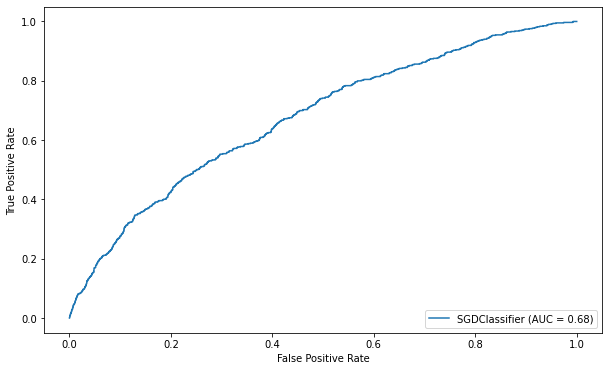

In [ ]:
plot_roc_curve(clf, X_test_beta, y_test_beta)

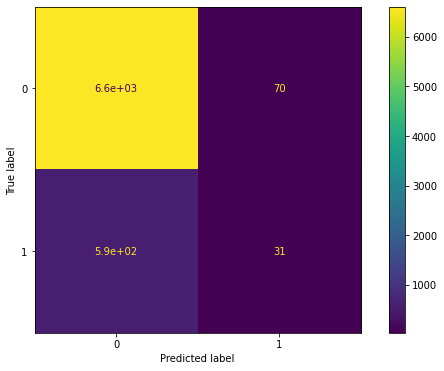

In [ ]:
plot_confusion_matrix(clf, X_test_beta, y_test_beta)

## Saving submission

In [ ]:
df_submission = pd.DataFrame()
df_submission['SK_ID_CURR'] = df_test['SK_ID_CURR']
df_submission['TARGET'] = clf.predict(X_test)

In [ ]:
df_submission.to_csv('submission.csv', index=False)

In [ ]:
df_submission.shape

(32706, 2)

In [ ]:
df_submission[df_submission['SK_ID_CURR'] == 100001]

,SK_ID_CURR,TARGET
0,100001,0


## Submission

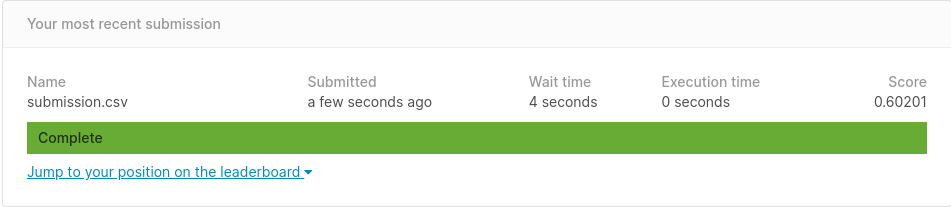